In [8]:
import openpyxl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from matplotlib import pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [12]:
# Open the workbook
book = openpyxl.load_workbook("test.xlsx")
sheet = book["Sheet1"]
print(book)
print(sheet)

# Get the E-series PM measurement
e_pm = []
e_ambient_temp = []
e_rh_pct = []
e_pressure = []
e_wind_speed = []

# Get the reference measurements
ref_pm = []

hours = []

counter = 0
while(sheet.cell(row=2+counter, column=3).value is not None):
    # Low cost senser data
    e_pm.append(sheet.cell(row=2+counter, column=3).value)
    e_ambient_temp.append(sheet.cell(row=2+counter, column=4).value)
    e_rh_pct.append(sheet.cell(row=2+counter, column=5).value)
    e_pressure.append(sheet.cell(row=2+counter, column=6).value)
    e_wind_speed.append(sheet.cell(row=2+counter, column=7).value)
    
    # Reference sensor data
    ref_pm.append(sheet.cell(row=2+counter, column=19).value)
    
    # Add the hours
    hours.append(counter)
    
    counter +=1

<Worksheet "Sheet1">


In [13]:
# Convert the arrays to numpy arrays and convert to a nx1 matrix
e_pm = np.asarray(e_pm, dtype=float).reshape(-1,1)
e_ambient_temp = np.asarray(e_ambient_temp, dtype=float).reshape(-1,1)
e_rh_pct = np.asarray(e_rh_pct, dtype=float).reshape(-1,1)
e_pressure = np.asarray(e_pressure, dtype=float).reshape(-1,1)
e_wind_speed = np.asarray(e_wind_speed, dtype=float).reshape(-1,1)
ref_pm = np.asarray(ref_pm, dtype=float)
hours = np.asarray(hours, dtype=float)

In [20]:
# Build the DATA matrix
DATA = np.concatenate((e_pm, e_ambient_temp, e_rh_pct, e_pressure, e_wind_speed), axis=1)
print(DATA)

[[ 6.79597701e-01 -1.92827586e+00  3.44006897e+01  9.22000000e+02
   2.55598333e+00]
 [ 5.01925287e-01 -2.19200000e+00  3.43250000e+01  9.22000000e+02
   2.68201667e+00]
 [ 5.59390805e-01 -1.82817241e+00  3.46017241e+01  9.22000000e+02
   3.12746667e+00]
 ...
 [ 3.11777586e+00 -4.89625862e+00  3.45244828e+01  9.24000000e+02
   4.29300000e-01]
 [ 3.17956897e+00 -5.14606897e+00  3.44324138e+01  9.24000000e+02
   4.47416667e-01]
 [ 2.67960345e+00 -3.28548276e+00  3.41684483e+01  9.24000000e+02
   6.69700000e-01]]


In [15]:
DATA_train, DATA_test, ref_pm_train, ref_pm_test = train_test_split(DATA, ref_pm, random_state=0)

In [16]:
# Simple linear Regression with the E-series PM data
# Linear Regression Method
SLR_PM = LinearRegression().fit(DATA_train[:,0].reshape(-1,1), ref_pm_train)
print("Training set score: {:0.6f}".format(SLR_PM.score(DATA_train[:,0].reshape(-1,1), ref_pm_train)))
print("Test set score: {:0.6f}".format(SLR_PM.score(DATA_test[:,0].reshape(-1,1), ref_pm_test)))

print('RMSE: {:0.4f}'.format(np.sqrt(metrics.mean_squared_error(ref_pm, SLR_PM.predict(DATA[:,0].reshape(-1,1))))))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(ref_pm, SLR_PM.predict(DATA[:,0].reshape(-1,1)))))
print('R2: {:0.4f}'.format(metrics.r2_score(ref_pm, SLR_PM.predict(DATA[:,0].reshape(-1,1)))))
print('Estimator feature strengths: {}'.format(SLR_PM.coef_))

Training set score: 0.832510
Test set score: 0.767852
RMSE: 2.6683
MAE: 1.7153
R2: 0.8147
Estimator feature strengths: [0.59214595]


In [17]:
# Simple linear Regression with the metoerological features
# Ambient Temp., rh_pct, pressure, windpeed
# Linear Regression Method
SLR = LinearRegression().fit(DATA_train, ref_pm_train)
print("Training set score: {:0.6f}".format(SLR.score(DATA_train, ref_pm_train)))
print("Test set score: {:0.6f}".format(SLR.score(DATA_test, ref_pm_test)))

print('RMSE: {:0.4f}'.format(np.sqrt(metrics.mean_squared_error(ref_pm, SLR.predict(DATA)))))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(ref_pm, SLR.predict(DATA))))
print('R2: {:0.4f}'.format(metrics.r2_score(ref_pm, SLR.predict(DATA))))
print('Estimator feature strengths: {}'.format(SLR.coef_))

Training set score: 0.837987
Test set score: 0.772983
RMSE: 2.6292
MAE: 1.6584
R2: 0.8201
Estimator feature strengths: [ 0.58806235  0.02661238 -0.00632406  0.00796834 -0.30537353]


In [32]:
# Boosted linear Regression with the metoerological features
# Ambient Temp., rh_pct, pressure, windpeed
# Linear Regression Method
BLR = ElasticNet(alpha=0.001, max_iter=1000000).fit(DATA_train, ref_pm_train)
print("Training set score: {:0.6f}".format(BLR.score(DATA_train, ref_pm_train)))
print("Test set score: {:0.6f}".format(BLR.score(DATA_test, ref_pm_test)))

print('RMSE: {:0.4f}'.format(np.sqrt(metrics.mean_squared_error(ref_pm, BLR.predict(DATA)))))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(ref_pm, BLR.predict(DATA))))
print('R2: {:0.4f}'.format(metrics.r2_score(ref_pm, BLR.predict(DATA))))
print('Estimator feature strengths: {}'.format(SLR.coef_))

Training set score: 0.837987
Test set score: 0.772983
RMSE: 2.6292
MAE: 1.6584
R2: 0.8201
Estimator feature strengths: [ 0.58806235  0.02661238 -0.00632406  0.00796834 -0.30537353]


In [37]:
# Decision tree regression method
tree_regressor_full = DecisionTreeRegressor(max_depth=None, min_samples_leaf=8).fit(DATA_train, ref_pm_train)
print("Training set score: {:0.6f}".format(tree_regressor_full.score(DATA_train, ref_pm_train)))
print("Test set score: {:0.6f}".format(tree_regressor_full.score(DATA_test, ref_pm_test)))

print('RMSE: {:0.4f}'.format(np.sqrt(metrics.mean_squared_error(ref_pm, tree_regressor_full.predict(DATA)))))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(ref_pm, tree_regressor_full.predict(DATA))))
print('R2: {:0.4f}'.format(metrics.r2_score(ref_pm, tree_regressor_full.predict(DATA))))
print('Estimator feature strengths: {}'.format(tree_regressor_full.feature_importances_))

Training set score: 0.901673
Test set score: 0.728263
RMSE: 2.3699
MAE: 1.3886
R2: 0.8538
Estimator feature strengths: [0.94127322 0.02161858 0.01205756 0.01059721 0.01445344]


In [60]:
DATA_train, DATA_test, ref_pm_train, ref_pm_test = train_test_split(DATA[:len(DATA)//2], ref_pm[:len(ref_pm)//2], random_state=0)
tree_regressor_half = DecisionTreeRegressor(max_depth=None, min_samples_leaf=8).fit(DATA_train, ref_pm_train)
print("Training set score: {:0.6f}".format(tree_regressor_full.score(DATA_train, ref_pm_train)))
print("Test set score: {:0.6f}".format(tree_regressor_full.score(DATA_test, ref_pm_test)))

print('RMSE: {:0.4f}'.format(np.sqrt(metrics.mean_squared_error(ref_pm[len(ref_pm)//2:], tree_regressor_half.predict(DATA[len(DATA)//2:])))))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(ref_pm[len(ref_pm)//2:], tree_regressor_half.predict(DATA[len(DATA)//2:]))))
print('R2: {:0.4f}'.format(metrics.r2_score(ref_pm[len(ref_pm)//2:], tree_regressor_half.predict(DATA[len(DATA)//2:]))))
print('Estimator feature strengths: {}'.format(tree_regressor_half.feature_importances_))

Training set score: 0.818274
Test set score: 0.814803
RMSE: 3.4220
MAE: 2.1106
R2: 0.7827
Estimator feature strengths: [0.89296196 0.05670869 0.01384265 0.01615994 0.02032676]


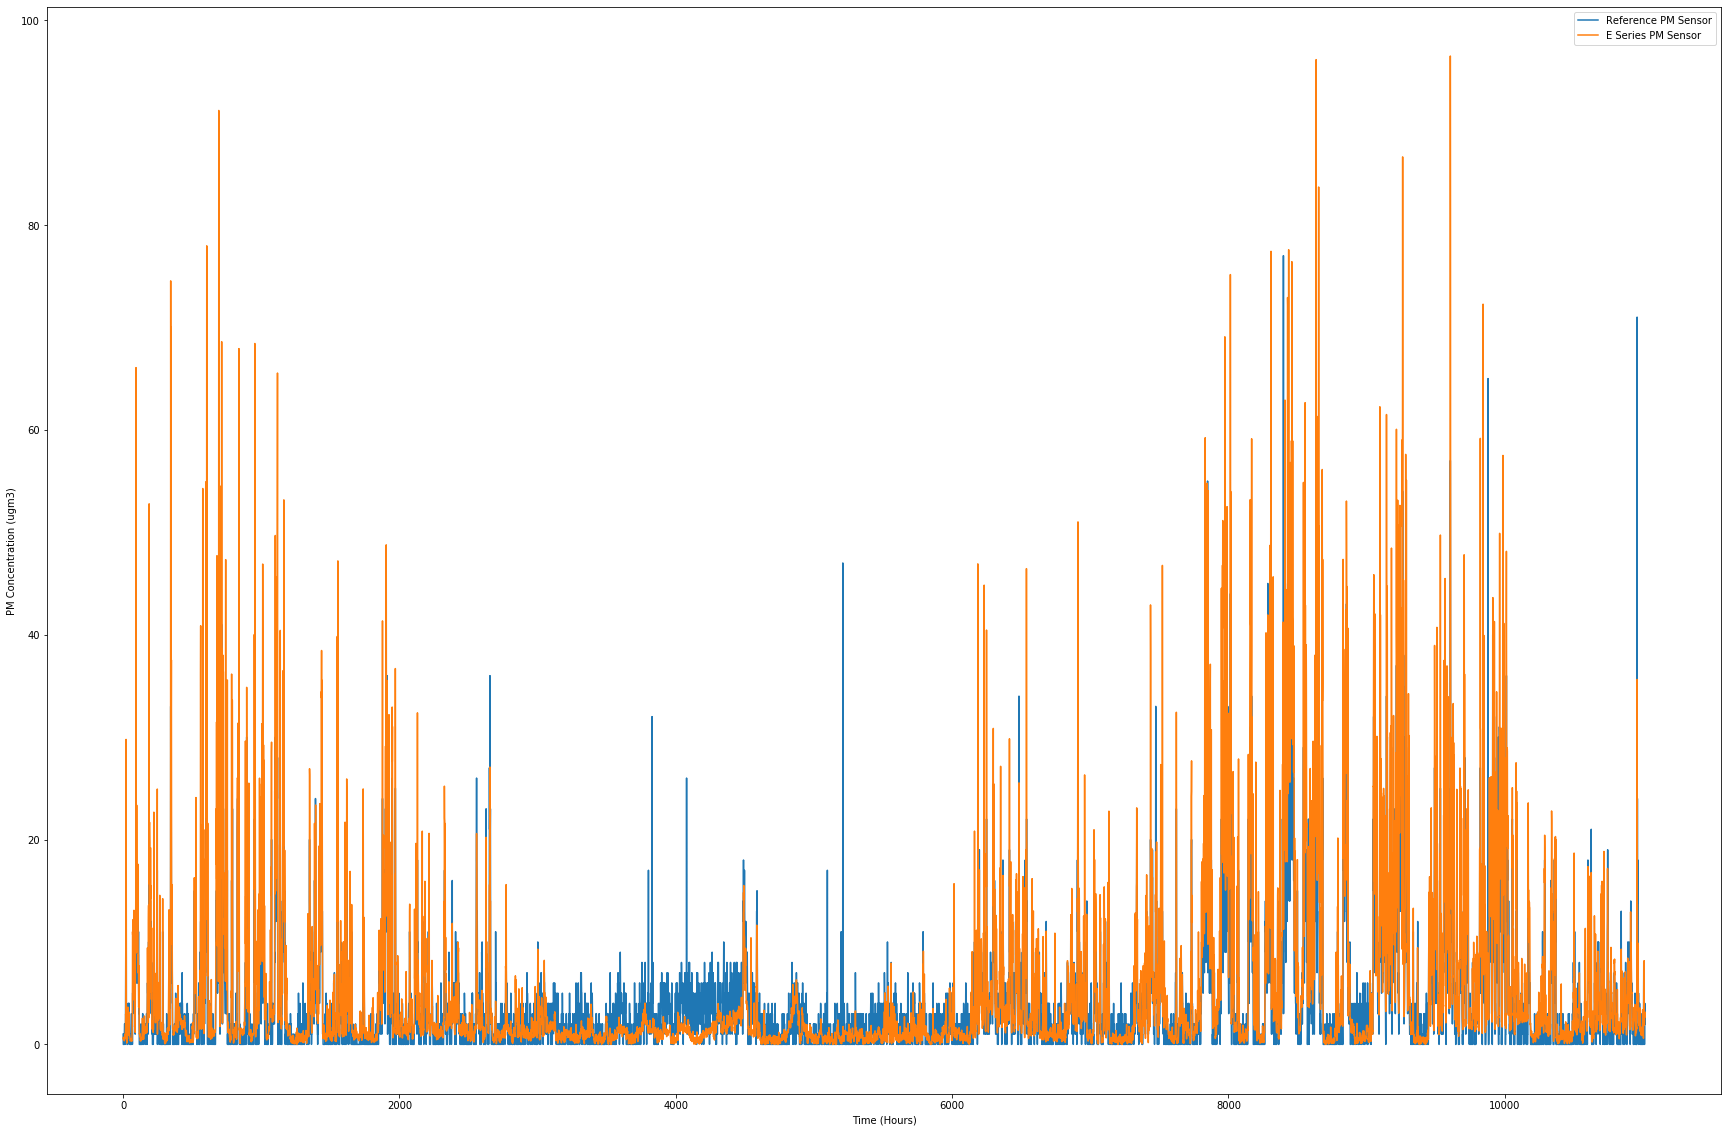

In [18]:
plt.figure(figsize=(30,20))
plt.plot(hours, ref_pm, label="Reference PM Sensor")
plt.plot(hours, DATA[:,0], label="E Series PM Sensor")
plt.xlabel('Time (Hours)')
plt.ylabel('PM Concentration (ugm3)')
plt.legend(loc="best")

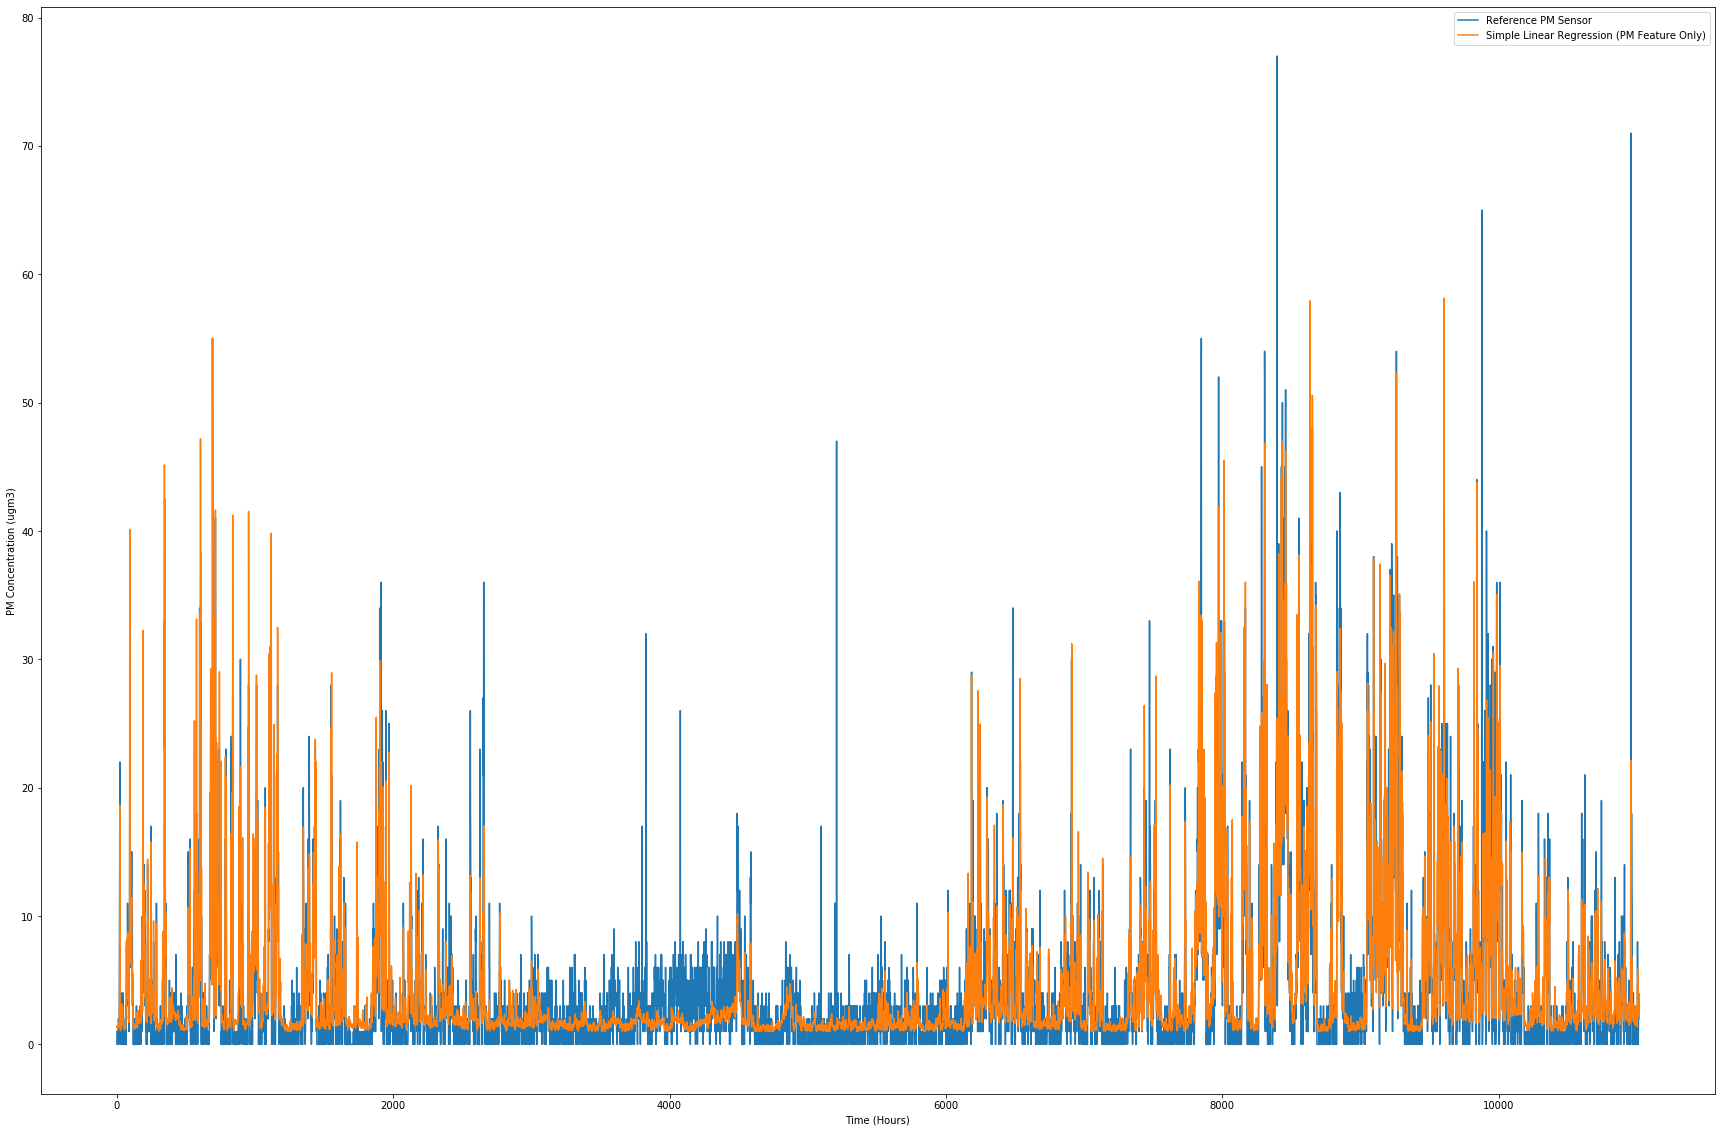

In [53]:
plt.figure(figsize=(30,20))
plt.plot(hours, ref_pm, label="Reference PM Sensor")
plt.plot(hours, SLR_PM.predict(DATA[:,0].reshape(-1,1)), label="Simple Linear Regression (PM Feature Only)")
plt.xlabel('Time (Hours)')
plt.ylabel('PM Concentration (ugm3)')
plt.legend(loc='best')

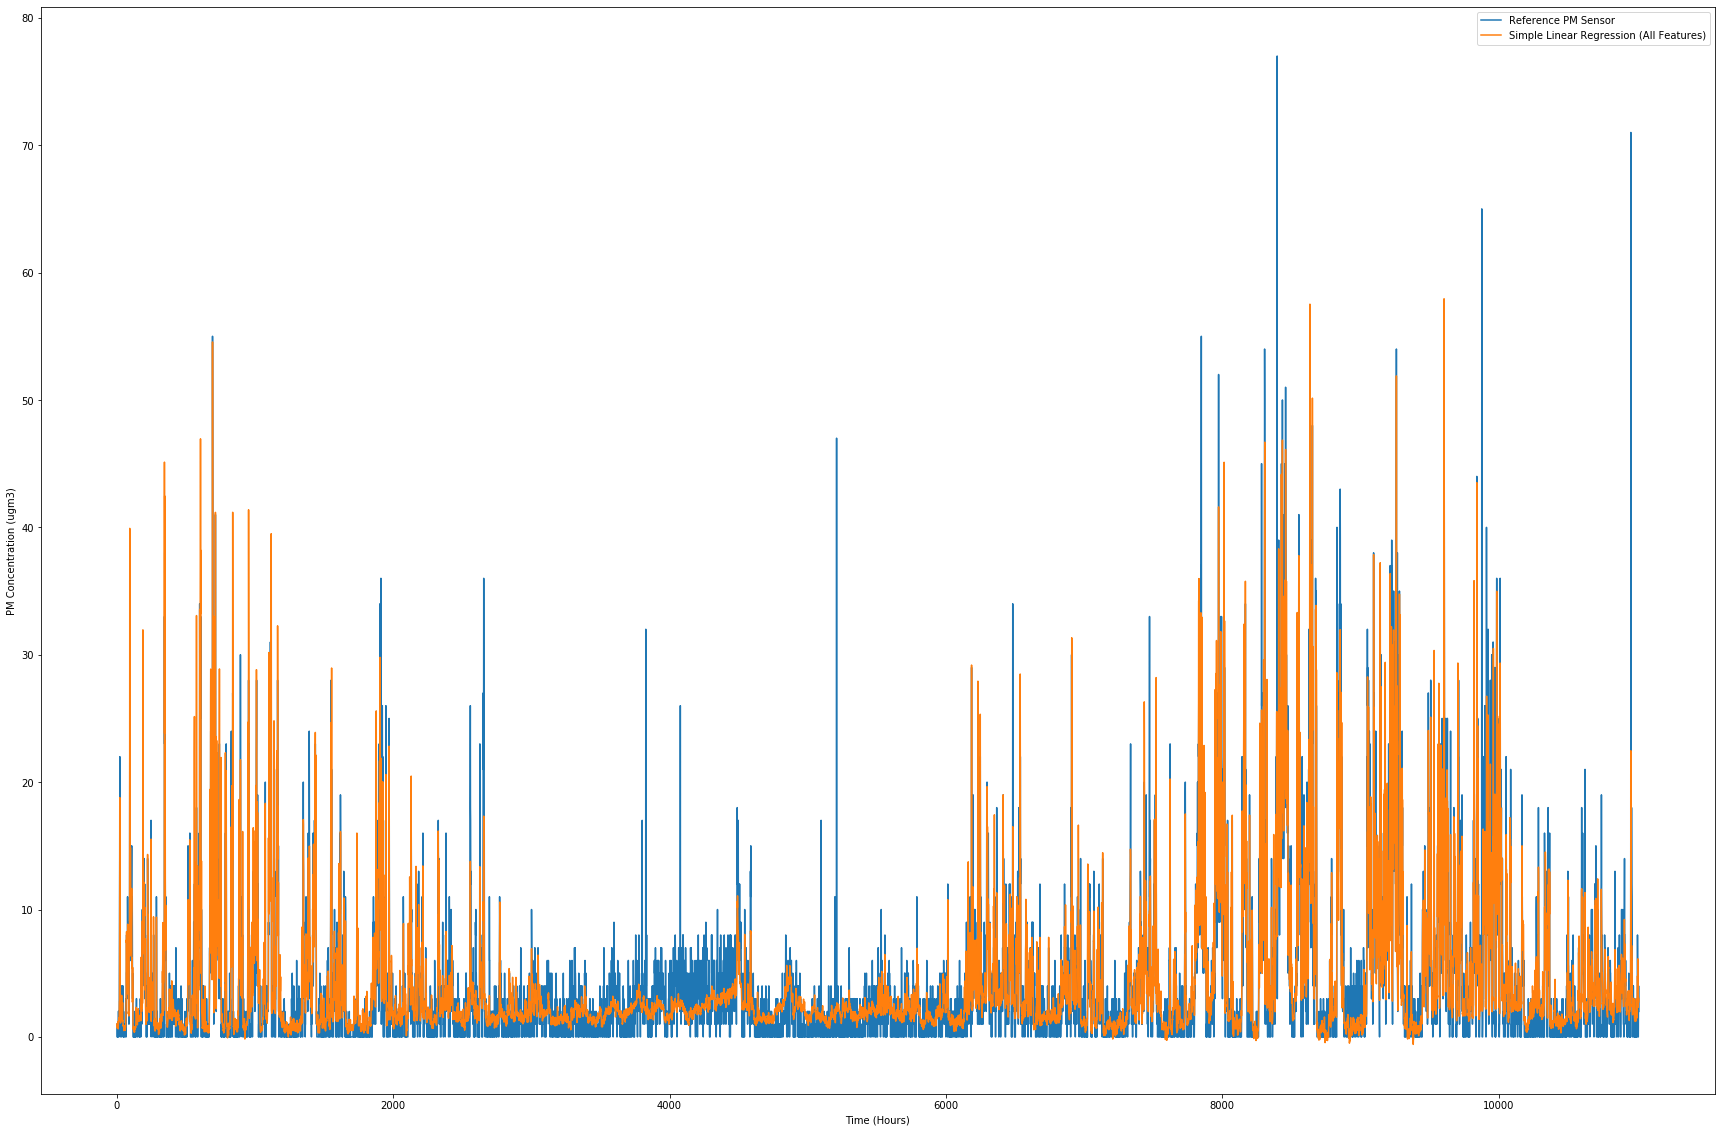

In [54]:
plt.figure(figsize=(30,20))
plt.plot(hours, ref_pm, label="Reference PM Sensor")
plt.plot(hours, SLR.predict(DATA), label="Simple Linear Regression (All Features)")
plt.xlabel('Time (Hours)')
plt.ylabel('PM Concentration (ugm3)')
plt.legend(loc='best')

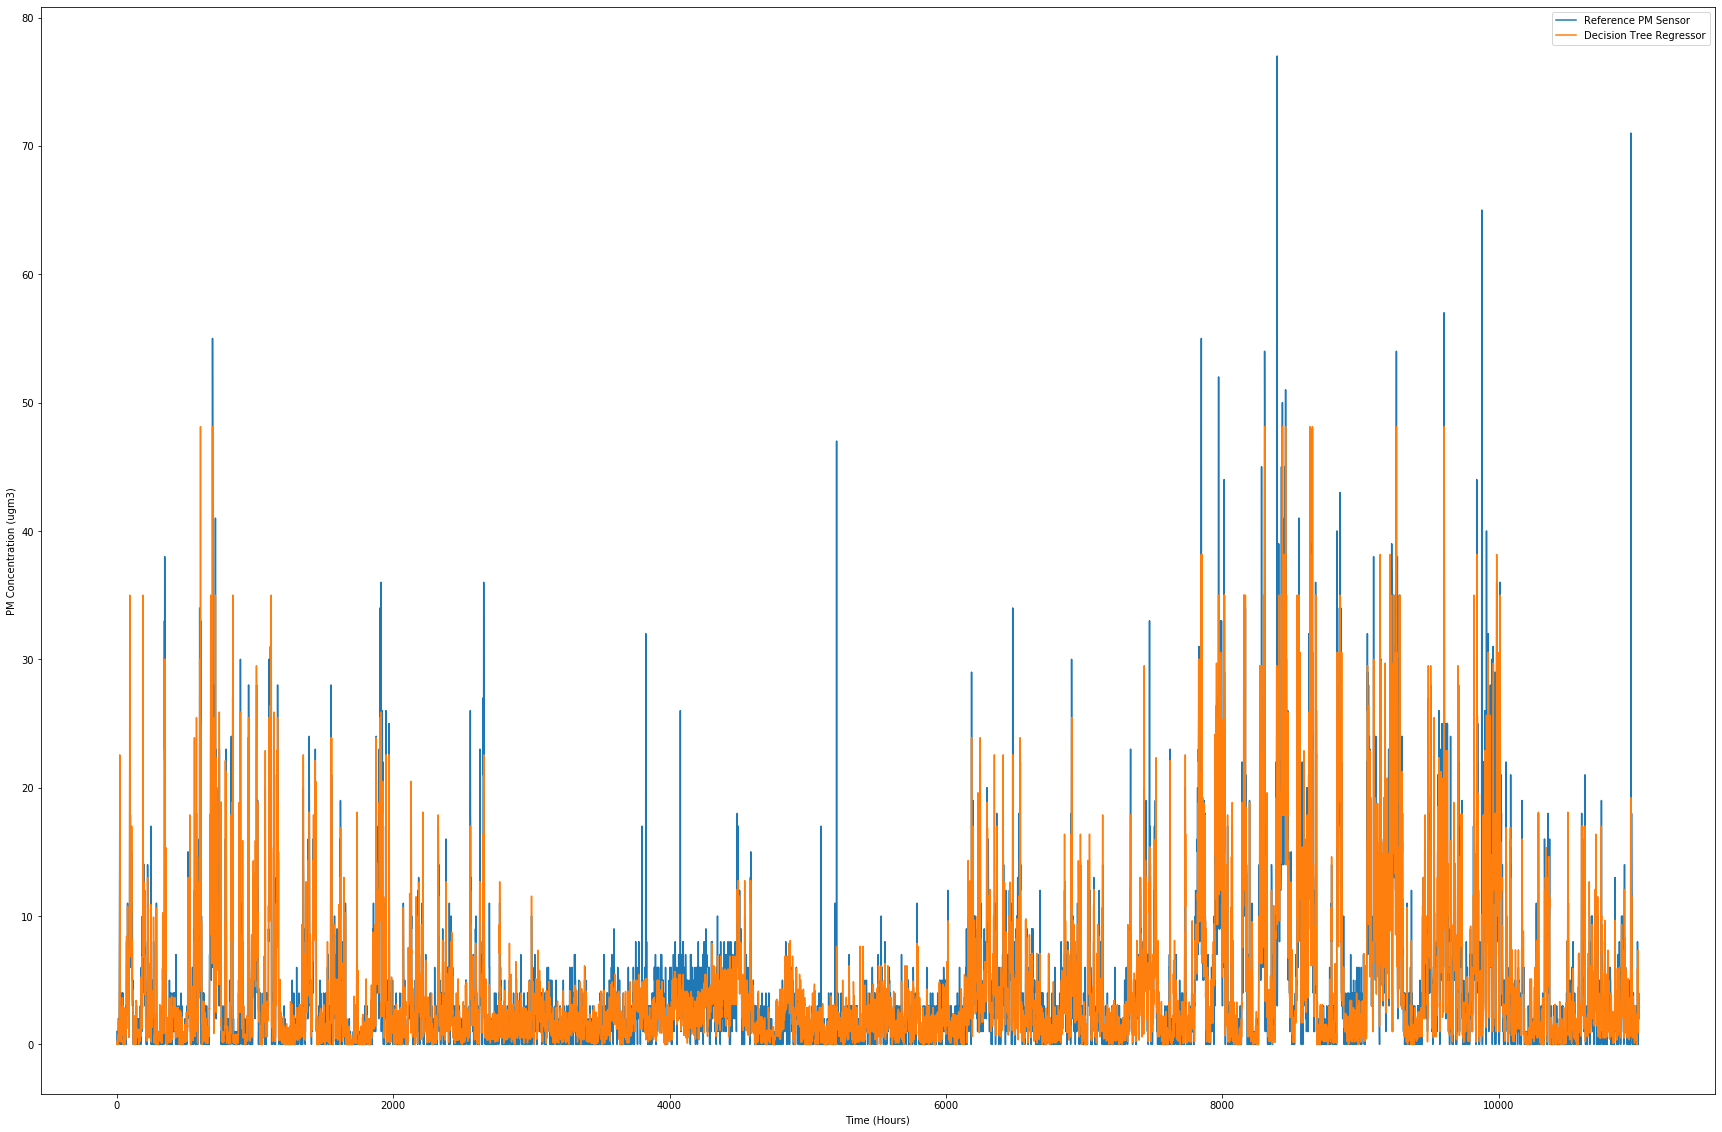

In [56]:
plt.figure(figsize=(30,20))
plt.plot(hours, ref_pm, label="Reference PM Sensor")
plt.plot(hours, tree_regressor_full.predict(DATA), label="Decision Tree Regressor")
plt.xlabel('Time (Hours)')
plt.ylabel('PM Concentration (ugm3)')
plt.legend(loc='best')

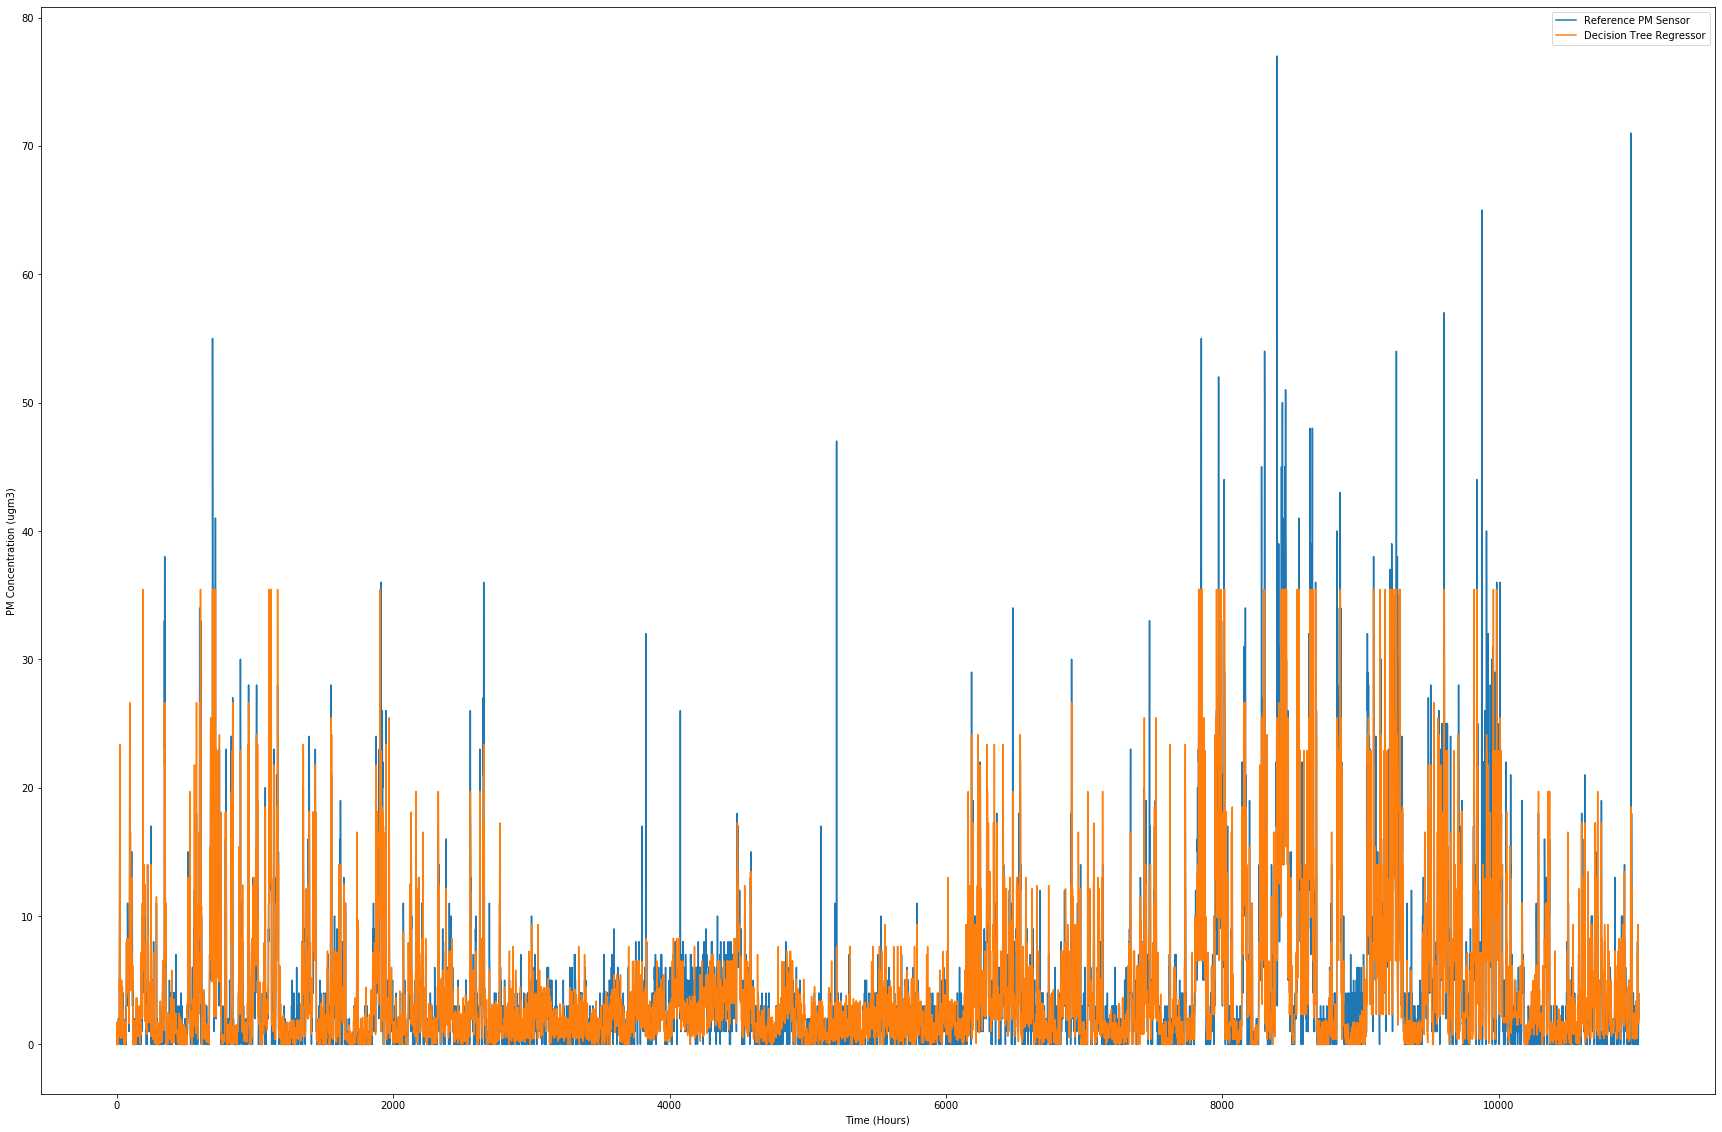

In [61]:
plt.figure(figsize=(30,20))
plt.plot(hours, ref_pm, label="Reference PM Sensor")
plt.plot(hours, tree_regressor_half.predict(DATA), label="Decision Tree Regressor")
plt.xlabel('Time (Hours)')
plt.ylabel('PM Concentration (ugm3)')
plt.legend(loc='best')